In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA


dfTrain = pd.read_csv('Collection/titanic_comp/train.csv')
dfTest = pd.read_csv('Collection/titanic_comp/test.csv')



In [16]:
import sys
sys.path.append('Collection/titanic_comp/toolkit')
import BasicAnalysis 

In [19]:
import importlib
importlib.reload(BasicAnalysis)



<module 'BasicAnalysis' from 'Collection/titanic_comp/toolkit/BasicAnalysis.py'>

In [23]:
dfTrain.Age = dfTrain.Age.fillna(dfTrain.Age.median())
dfTest.Age = dfTest.Age.fillna(dfTrain.Age.median())

dfTrain.Embarked = dfTrain.Embarked.fillna(value='S')
dfTest.Embarked = dfTrain.Embarked.fillna(value= 'S')


2 columns were dropped
try to convert the dropped columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/distributions.py:993: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  support, fill_from, density, **artist_kws
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/distributions.py:146: MatplotlibDepr

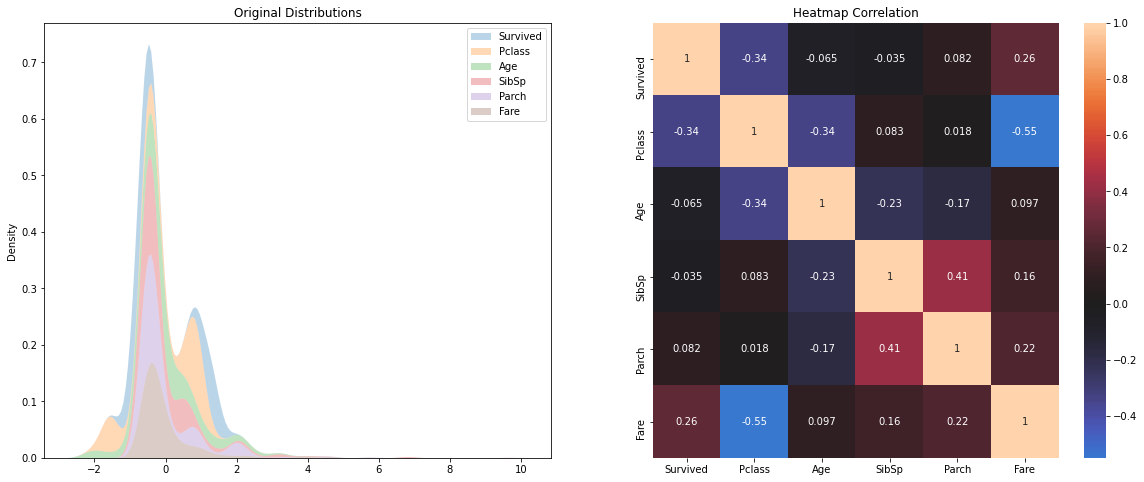

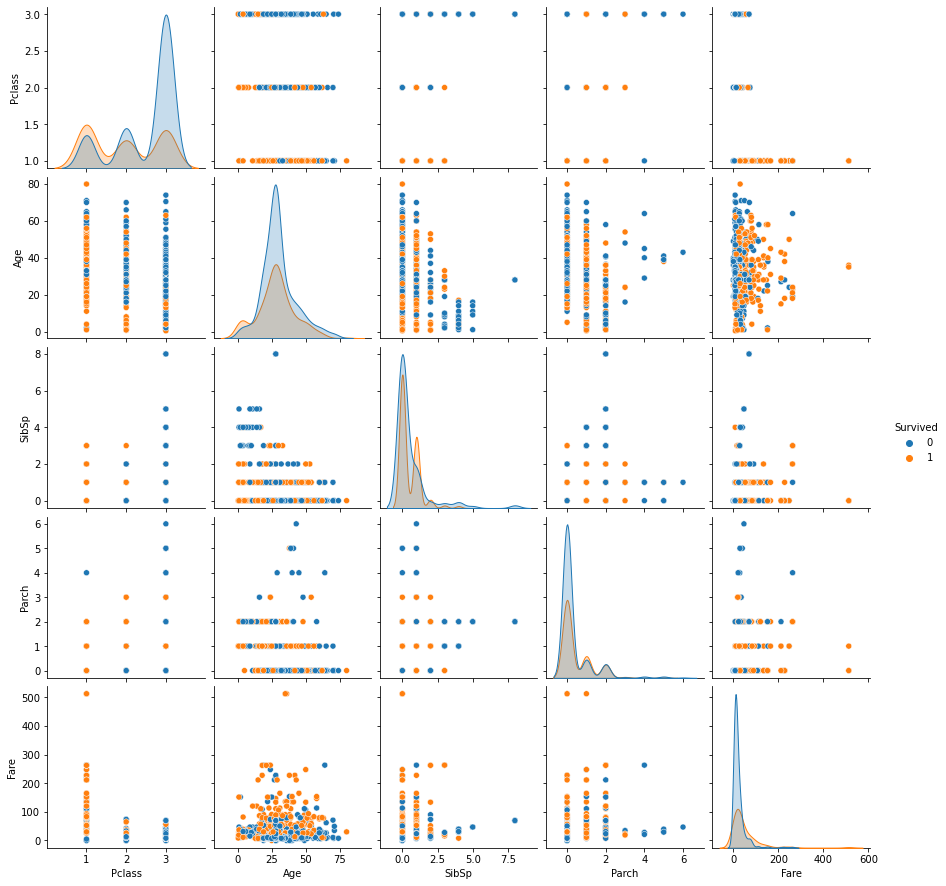

In [46]:
BasicAnalysis.buildgraph(dfTrain)

In [44]:
print(dfTrain.isna().sum())
dfTrain.info()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [40]:
print(dfTest.isna().sum())
dfTest.info()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [21]:
dfTrain.drop(["Name","PassengerId","Ticket"], axis=1, inplace=True)
dfTest.drop(["Name","PassengerId","Ticket"], axis=1, inplace=True)


In [41]:
dfTrain.drop(["Cabin"], axis=1, inplace=True)
dfTest.drop(["Cabin"], axis=1, inplace=True)

In [45]:
dfTrain.Age = dfTrain.Age.fillna(dfTrain.Age.median())
dfTest.Age = dfTest.Age.fillna(dfTest.Age.median())

In [67]:
dfTrain.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [60]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector as selector


numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

categorical_features = ['Embarked', 'Sex', 'Pclass']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])



In [62]:
pipe_data = preprocessor.fit_transform(dfTrain)

In [63]:
pipe_data

array([[22.    ,  7.25  ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [38.    , 71.2833,  1.    , ...,  1.    ,  0.    ,  0.    ],
       [26.    ,  7.925 ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [28.    , 23.45  ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [26.    , 30.    ,  1.    , ...,  1.    ,  0.    ,  0.    ],
       [32.    ,  7.75  ,  0.    , ...,  0.    ,  0.    ,  1.    ]])

0        1    2    3    4    5    6    7    8    9
0  22.0   7.2500  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0
1  38.0  71.2833  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
2  26.0   7.9250  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0
3  35.0  53.1000  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0
4  35.0   8.0500  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0

In [42]:
#process to seperate function file 

from sklearn.preprocessing import *

#necessary Packages 
import matplotlib.pyplot as plt 
import seaborn as sns


def pickScaler(x):
    # for now choose a number

    
    
    scale  = [
    StandardScaler(),
    MinMaxScaler(),
    Normalizer(),
    MaxAbsScaler,
    RobustScaler(),
    QuantileTransformer(),
    PowerTransformer
    ]
    #set map location , two side by side
    fig, (ax2) = plt.subplots(ncols=2, figsize=(20, 8))
    fig, (ax1) = plt.subplots(ncols=2, figsize=(20, 8))
    ax2[0].set_title('Original Testing')
    ax2[1].set_title('Original Training')
    ax1[0].set_title('Scaled Training')
    ax1[1].set_title('Scaled Testing')
        

    ds_map0 = sns.kdeplot(data = dfTrain, ax=ax2[0], legend=True, multiple="stack",fill=True, Alpha=.3, linewidth=0)
    ds_map1 = sns.kdeplot(data = dfTest, ax=ax2[1], legend=True, multiple="stack",fill=True, Alpha=.3, linewidth=0)
    
    #scale data
    scaler = scale[x]
    X_train = scaler.fit_transform(dfTrain)
    X_test =  scaler.fit(dfTest)
    
    tempX_train_df = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
    tempX_test_df = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

   
    
  
    
    ds_map2 = sns.kdeplot(data = tempX_train_df ,ax=ax1[0], legend=True, multiple="stack",fill=True, Alpha=.3, linewidth=0)
    ds_map3 = sns.kdeplot(data = tempX_test_df, ax=ax1[1], legend=True, multiple="stack",fill=True, Alpha=.3, linewidth=0)
   
    ds_map0
    ds_map1
    ds_map2
    ds_map4








In [43]:
pickScaler(1)


/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/distributions.py:993: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  support, fill_from, density, **artist_kws
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/distributions.py:146: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist_kws, fill, element, multiple, color, alpha
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/distributions.py:993: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  support, fill_from, density, **artist_kws
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/distributions.py:146: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 a

ValueError: could not convert string to float: 'male'

In [ ]:
import plotly.express as px

fig = px.scatter_3d(dfTrain, z='Age', x='Survived', y='Fare',
              color='Sex')
fig.show()

#nice! 

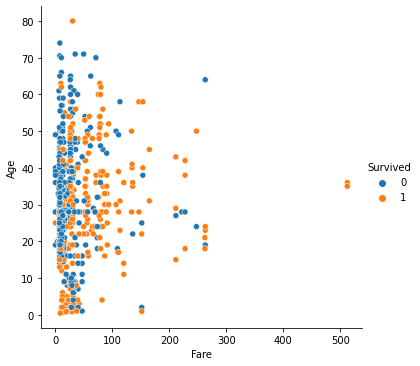

In [ ]:
sns.relplot(data=dfTrain, y='Age', hue='Survived', x='Fare',kind='scatter')

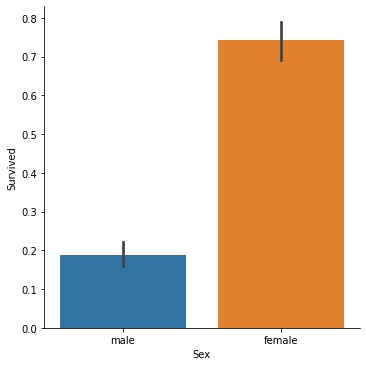

In [ ]:
sns.catplot(data=dfTrain, y='Survived', x='Sex', kind='bar')

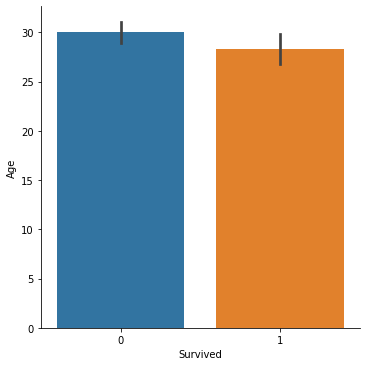

In [ ]:
sns.catplot(data=dfTrain, y='Age', x='Survived', kind='bar')

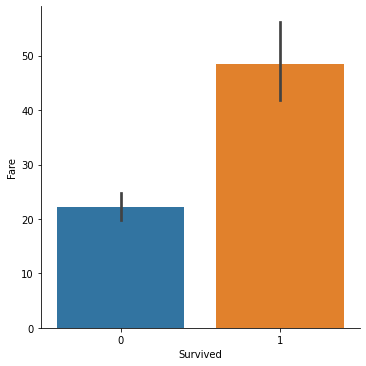

In [ ]:
sns.catplot(data=dfTrain, y='Fare', x='Survived', kind='bar');

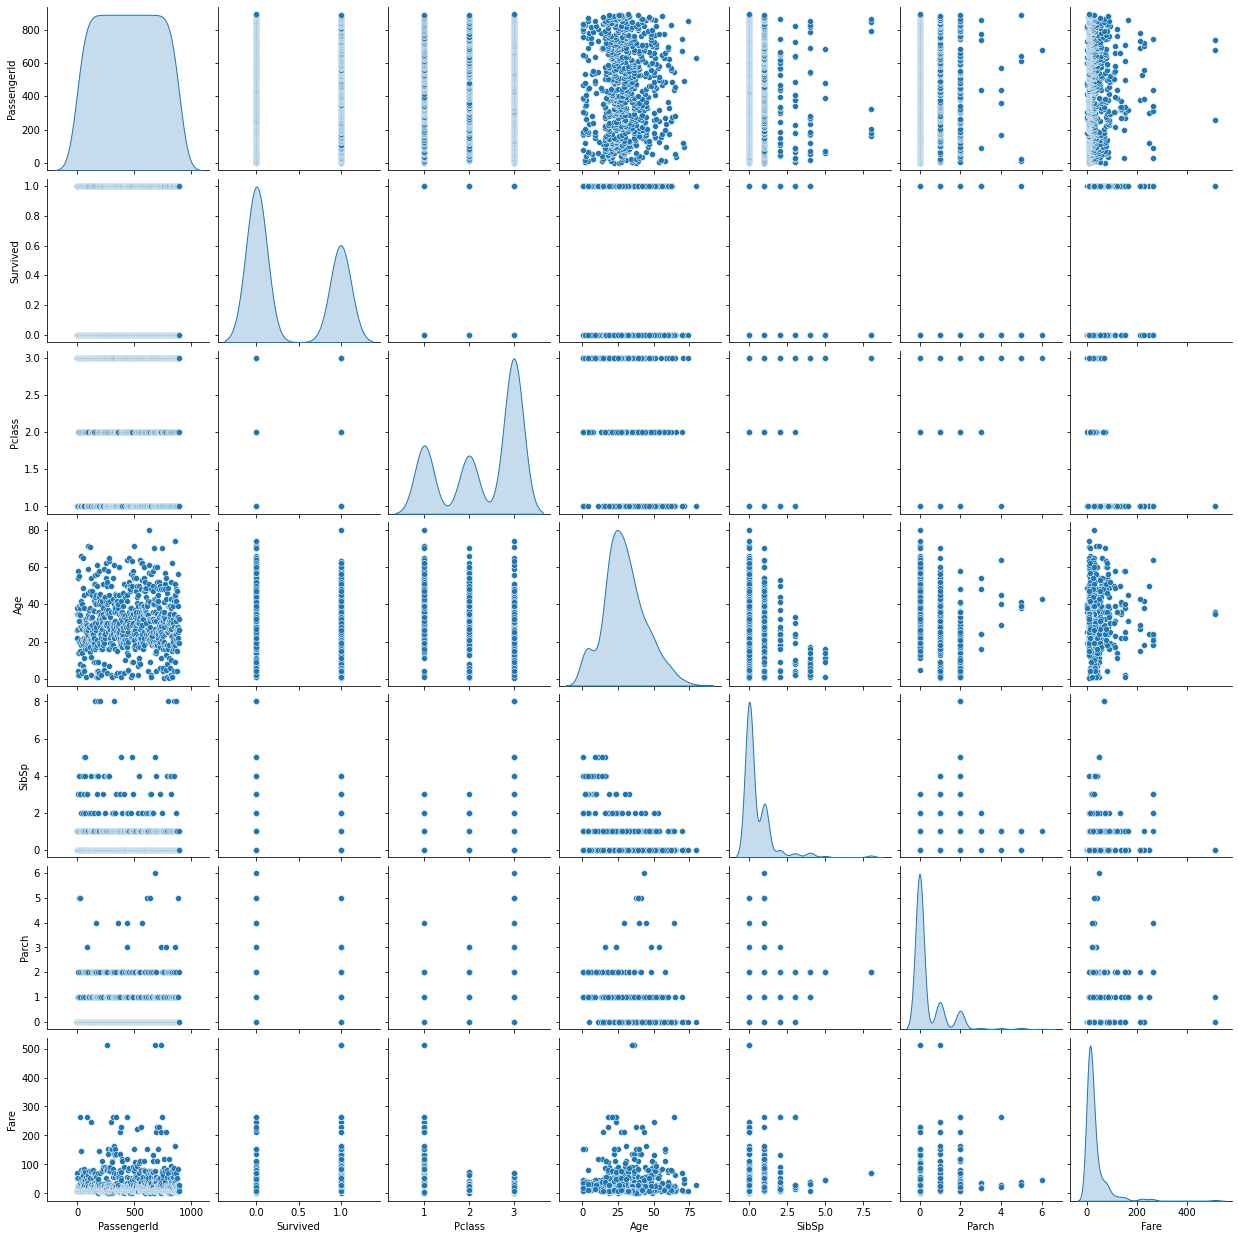

In [ ]:
sns.pairplot(dfTrain, diag_kind='kde');

In [ ]:
dfTrain.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

<AxesSubplot:>

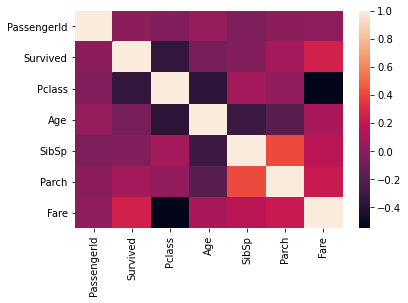

In [ ]:
sns.heatmap(dfTrain.corr())

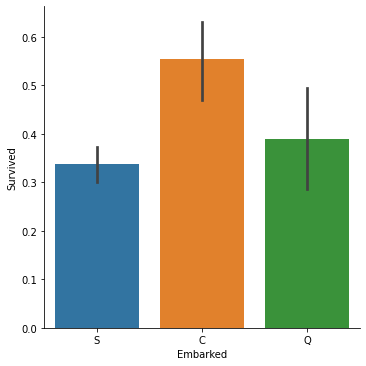

In [ ]:
sns.catplot(data=dfTrain, x='Embarked', y='Survived', kind='bar');

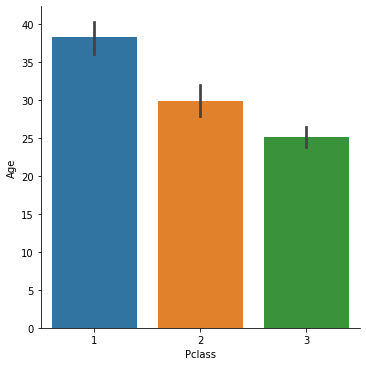

In [ ]:
sns.catplot(data=dfTrain, x='Pclass', y='Age', kind='bar');

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
scaler = StandardScaler()
onehot = OneHotEncoder()
labelit = LabelEncoder()

dfTrain.Age = scaler.fit_transform(dfTrain[['Age']])
dfTrain.Fare = scaler.fit_transform(dfTrain[['Fare']])
dfTrain.Embarked = labelit.fit_transform(dfTrain['Embarked'])
dfTrain.Sex = labelit.fit_transform(dfTrain['Sex'])

dfTest.Age = scaler.fit_transform(dfTest[['Age']])
dfTest.Fare = scaler.fit_transform(dfTest[['Fare']])
dfTest.Embarked = labelit.fit_transform(dfTest['Embarked'])
dfTest.Sex = labelit.fit_transform(dfTest['Sex'])



In [ ]:
dfTrain.head(40)

Survived  Pclass  Sex       Age  SibSp  Parch      Fare        Cabin  \
0          0       3    1 -0.565736      1      0 -0.502445          NaN   
1          1       1    0  0.663861      1      0  0.786845          C85   
2          1       3    0 -0.258337      0      0 -0.488854          NaN   
3          1       1    0  0.433312      1      0  0.420730         C123   
4          0       3    1  0.433312      0      0 -0.486337          NaN   
5          0       3    1 -0.104637      0      0 -0.478116          NaN   
6          0       1    1  1.893459      0      0  0.395814          E46   
7          0       3    1 -2.102733      3      1 -0.224083          NaN   
8          1       3    0 -0.181487      0      2 -0.424256          NaN   
9          1       2    0 -1.180535      1      0 -0.042956          NaN   
10         1       3    0 -1.949034      1      1 -0.312172           G6   
11         1       1    0  2.200858      0      0 -0.113846         C103   
12         0       3    1 -0.719436      0      0 -0.486337          NaN   
13         0       3    1  0.740711      1      5 -0.018709          NaN   
14         0       3    0 -1.180535      0      0 -0.490280          NaN   
15         1       2    0  1.970308      0      0 -0.326267          NaN   
16         0       3    1 -2.102733      4      1 -0.061999          NaN   
17         1       2    1 -0.104637      0      0 -0.386671          NaN   
18         0       3    0  0.125912      1      0 -0.285997          NaN   
19         1       3    0 -0.104637      0      0 -0.502949          NaN   
20         0       2    1  0.433312      0      0 -0.124920          NaN   
21         1       2    1  0.356462      0      0 -0.386671          D56   
22         1       3    0 -1.103685      0      0 -0.486756          NaN   
23         1       1    1 -0.104637      0      0  0.066360           A6   
24         0       3    0 -1.641634      3      1 -0.224083          NaN   
25         1       3    0  0.663861      1      5 -0.016444          NaN   
26         0       3    1 -0.104637      0      0 -0.502949          NaN   
27         0       1    1 -0.796286      3      2  4.647001  C23 C25 C27   
28         1       3    0 -0.104637      0      0 -0.489776          NaN   
29         0       3    1 -0.104637      0      0 -0.489442          NaN   
30         0       1    1  0.817561      0      0 -0.090272          NaN   
31         1       1    0 -0.104637      1      0  2.301729          B78   
32         1       3    0 -0.104637      0      0 -0.492378          NaN   
33         0       2    1  2.815657      0      0 -0.437007          NaN   
34         0       1    1 -0.104637      1      0  1.006062          NaN   
35         0       1    1  0.971260      1      0  0.398582          NaN   
36         1       3    1 -0.104637      0      0 -0.502864          NaN   
37         0       3    1 -0.642586      0      0 -0.486337          NaN   
38         0       3    0 -0.873136      2      0 -0.285997          NaN   
39         1       3    0 -1.180535      1      0 -0.422074          NaN   

    Embarked  
0          2  
1          0  
2          2  
3          2  
4          2  
5          1  
6          2  
7          2  
8          2  
9          0  
10         2  
11         2  
12         2  
13         2  
14         2  
15         2  
16         1  
17         2  
18         2  
19         0  
20         2  
21         2  
22         1  
23         2  
24         2  
25         2  
26         0  
27         2  
28         1  
29         2  
30         0  
31         0  
32         1  
33         2  
34         0  
35         2  
36         0  
37         2  
38         2  
39         0